In [1]:
%matplotlib inline
import os, sys
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt

import torch
print(torch.__version__)

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))

sys.path.append('..')
import pytorchnet

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

0.4.1


The data set is a set of points on a line with added noise:

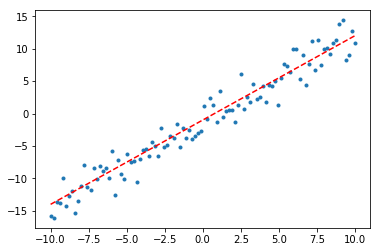

In [2]:
batchSize=100
noiseScale=2.0
m=1.3
b=-1.0
x=np.linspace(-10,10,batchSize)
y=(x*m+b)+np.random.normal(scale=noiseScale,size=(batchSize,))

plt.scatter(x,y,marker='.')
plt.plot(x,(x*m+b),'r--')

Use a linear regression model to fit a line to these points:

1.3253481560528813 -1.1925816476070643


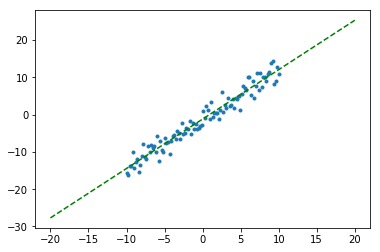

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(x.reshape(-1,1),y)

plt.scatter(x,y,marker='.')

xx=np.linspace(-20,20,200)
yy=reg.predict(xx.reshape(-1,1))
plt.plot(xx,yy,'g--')
print(reg.coef_[0],reg.intercept_)

Alternative model:

1.3224075619934752 -1.1925816476070643


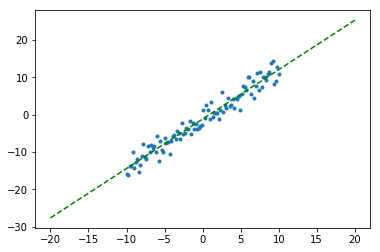

In [4]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

reg.fit(x.reshape(-1,1),y)

plt.scatter(x,y,marker='.')

xx=np.linspace(-20,20,200)
yy=reg.predict(xx.reshape(-1,1))
plt.plot(xx,yy,'g--')
print(reg.coef_[0],reg.intercept_)

Using Pytorch the `m` and `b` parameters can be estimated by minimizing the difference between the line defined by the estimation and the known points:

0 64.44380950927734
1000 12.42035961151123
2000 3.6766562461853027
3000 3.288703203201294
4000 3.287106990814209
5000 3.28710675239563
6000 3.28710675239563
7000 3.28710675239563
8000 3.28710675239563
9000 3.287106990814209
1.3 -1.0 1.3253477811813354 -1.192581295967102


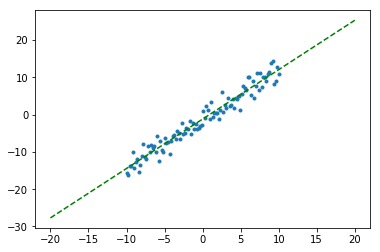

In [5]:

mb=torch.zeros((2,),requires_grad=True).float()
xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y).float()

loss=torch.nn.MSELoss() # try L1Loss to see difference
opt=torch.optim.Adam([mb])

iters=10000

for i in range(iters):
    opt.zero_grad()
    line=xt*mb[0]+mb[1]
    lossval=loss(line,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y,marker='.')

xx=np.linspace(-20,20,200)
mm,bb=mb.data.numpy().tolist() # guessed m and b
plt.plot(xx,(xx*mm+bb),'g--')

print(m,b,mm,bb)

If the data set is not known to be linear or otherwise defined by estimable parameters, a network can be trained to estimate `y` from `x` (in this example case resulting in overfitting):

0 64.44380950927734
1000 3.2923200130462646
2000 3.2491254806518555
3000 3.2359089851379395
4000 3.21980881690979
5000 3.1945502758026123
6000 3.1652793884277344
7000 3.1508893966674805
8000 3.130260705947876
9000 3.112543821334839


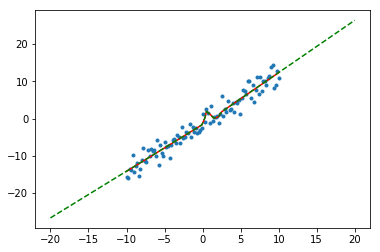

In [6]:
net=pytorchnet.DenseNet(1,1,[20,10,5])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y[:,np.newaxis]).float()

loss=torch.nn.MSELoss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    pred=net(xt)
    lossval=loss(pred,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y,marker='.')
plt.plot(x,pred.data.numpy(),'r')

xx=np.linspace(-20,20,200)
plt.plot(xx,net(torch.from_numpy(xx).float()).data.numpy(),'g--')

Non-linear data set:

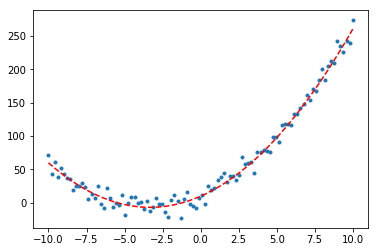

In [7]:
batchSize=100
noiseScale=10.0

a=1.5
b=10 
c=10 

x=np.linspace(-10,10,batchSize)
y=a*(x*x)+b*x+c+np.random.normal(scale=noiseScale,size=(batchSize,))

plt.scatter(x,y,marker='.')
plt.plot(x,(a*(x*x)+b*x+c),'r--')

0 64.93685913085938
1000 11.045454978942871
2000 9.024621963500977
3000 7.05375862121582
4000 6.935793399810791
5000 6.914922714233398
6000 6.889652252197266
7000 6.873149871826172
8000 6.859720230102539
9000 6.862421035766602


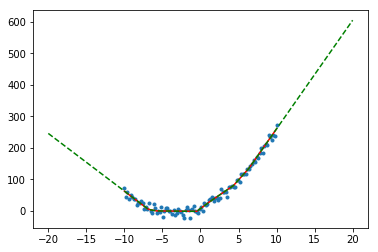

In [8]:
net=pytorchnet.DenseNet(1,1,[20,10,5])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y[:,np.newaxis]).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    pred=net(xt)
    lossval=loss(pred,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y,marker='.')
plt.plot(x,pred.data.numpy(),'r')

xx=np.linspace(-20,20,200)
plt.plot(xx,net(torch.from_numpy(xx).float()).data.numpy(),'g--')